In [2]:
import scipy.signal as sig
import numpy as np
import plotly.graph_objects as go
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
import scipy.optimize as so
from scipy.optimize import curve_fit
import os

In [3]:
nhead = 6
toVolt = 39.3216/((2**24) -1)
touAmp= (77/55)*toVolt

Skipping interval 3 due to out-of-bounds slice.
[-1.30402742 -1.42333602 -1.52684775 -1.60395713 -1.64940479 -1.67093682
 -1.69255323 -1.70565479 -1.64288213 -1.41886649 -1.1126321  -0.8818524
 -0.72193129 -0.54102191 -0.35366721]


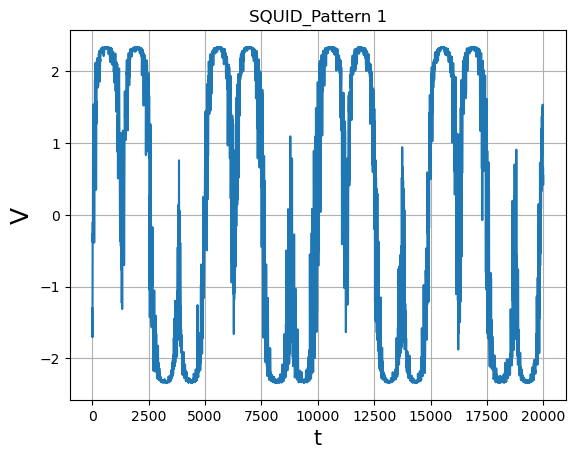

Skipping interval 3 due to out-of-bounds slice.
[-1.2209696  -1.25835711 -1.33522508 -1.47122821 -1.6326165  -1.77514698
 -1.88048449 -1.96506574 -2.05374856 -2.11734622 -2.12251888 -2.03468684
 -1.93450558 -1.87049777 -1.81130167]


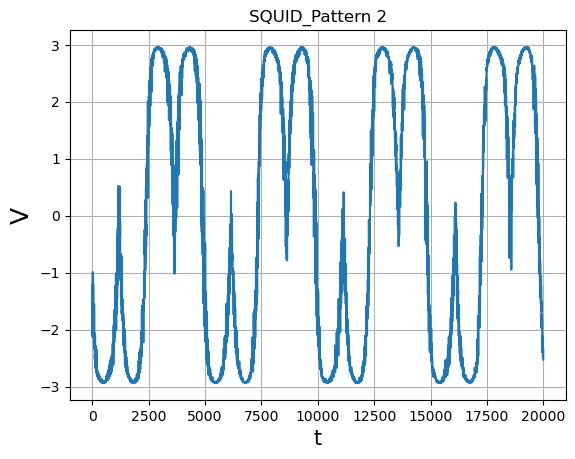

Skipping interval 3 due to out-of-bounds slice.
[-0.04506563 -0.04598672 -0.04653282 -0.04793203 -0.0502875  -0.05573672
 -0.0578836  -0.06150938 -0.06563204 -0.07084219 -0.07807032 -0.08127657
 -0.08326875 -0.0870586  -0.09059532]


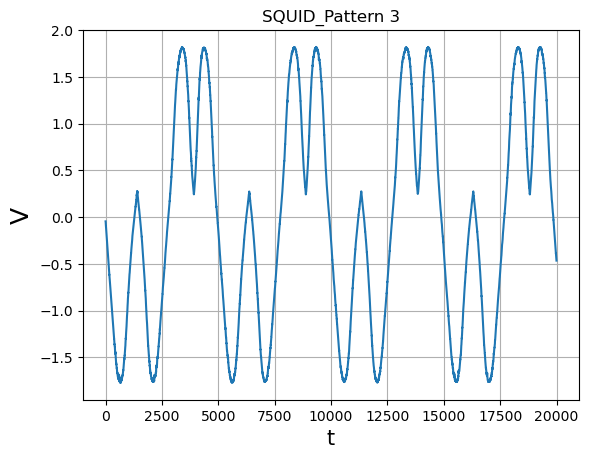

Skipping interval 3 due to out-of-bounds slice.
[-1.59670088 -1.62060713 -1.64332744 -1.66065947 -1.67378447 -1.6832251
 -1.68055088 -1.66703213 -1.63884385 -1.59987431 -1.56288759 -1.54014619
 -1.53281494 -1.52959931 -1.52248134]


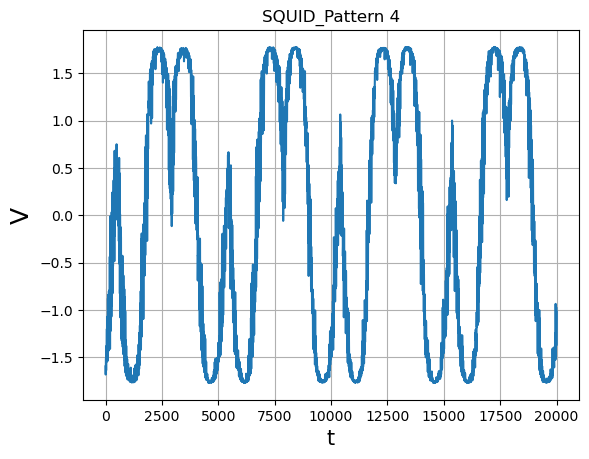

Skipping interval 3 due to out-of-bounds slice.
[1.57648603 1.58088994 1.59109931 1.60221572 1.61175478 1.62217744
 1.63463916 1.64498213 1.65298838 1.65905869 1.66543369 1.67090635
 1.67331104 1.67719932 1.67878838]


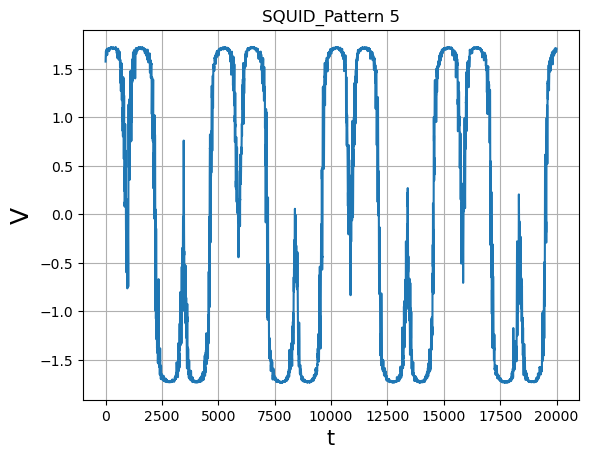

Skipping interval 3 due to out-of-bounds slice.
[2.07432669 2.07412512 2.07470872 2.07449309 2.07440637 2.0742634
 2.07236965 2.06931809 2.06690872 2.06437278 2.06343997 2.0633509
 2.06229856 2.06489544 2.0657345 ]


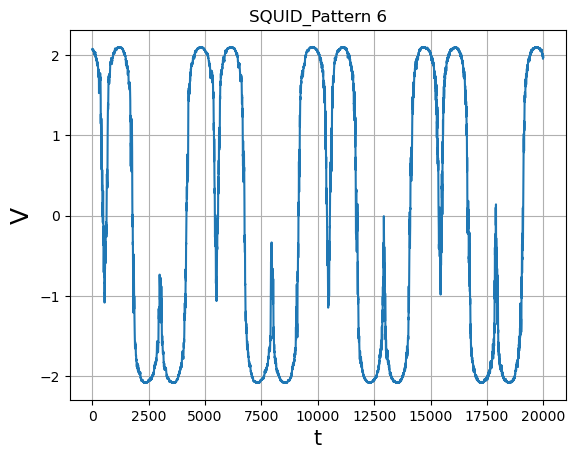

Skipping interval 3 due to out-of-bounds slice.
[2.37525014 2.37378295 2.37542827 2.37806264 2.38041108 2.3807603
 2.38279702 2.38637592 2.39045874 2.39415952 2.39639077 2.39463061
 2.3930603  2.39284233 2.39267827]


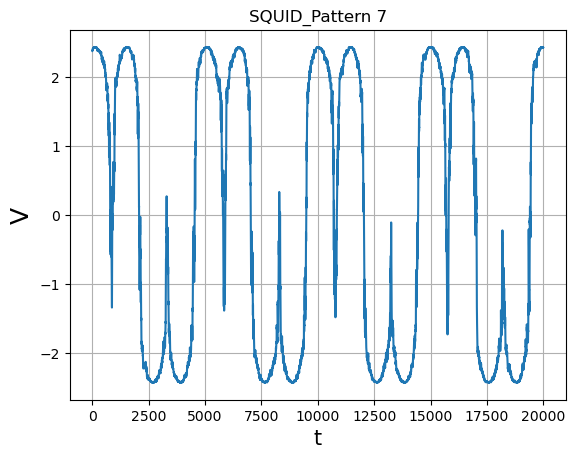

Skipping interval 3 due to out-of-bounds slice.
[-0.47610003 -0.50243206 -0.49542425 -0.44268987 -0.40894221 -0.47608128
 -0.6030891  -0.68747817 -0.78229692 -0.90922037 -1.04920319 -1.17216569
 -1.2767907  -1.37364618 -1.46018681]


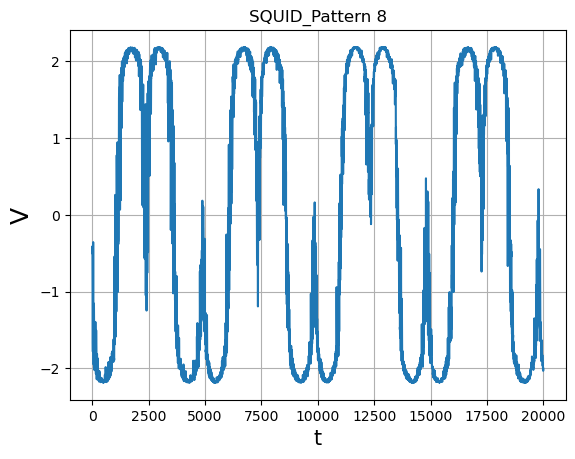

In [5]:
SQUID=[]
A=[]
MAX=[]
MIN=[]
for i in range(8):
    file_string = (r"C:\Users\n1cos\Downloads\clusterCryostatRun18\pattern\pattern_SQ" + str(i + 1) + "_000.bin")
    file_path = os.path.normpath(file_string)
    
    with open(file_path, 'rb') as fd:
        read_data = np.fromfile(file=fd, dtype=np.int32)
    
    dat = toVolt * read_data[nhead:]
    xs = np.arange(len(dat))
    x = xs[1:20000]
    dat1 = dat[1:20000]
    
    MAX.clear()
    MIN.clear()

    # Ensure the length of dat1 is sufficient for the intervals
    interval_length = 5000
    num_intervals = 19  # Defined as 19 intervals of 5000 points each

    for j in range(num_intervals):
        Interval_Anfang = interval_length * j
        Interval_Ende = Interval_Anfang + interval_length

        # Make sure the slice doesn't exceed the length of dat1
        if Interval_Ende <= len(dat1):
            a = max(dat1[Interval_Anfang:Interval_Ende])
            b = min(dat1[Interval_Anfang:Interval_Ende])
            MAX.append(a)
            MIN.append(b)
        else:
            # If the interval exceeds the length, break the loop or handle it
            print(f"Skipping interval {j} due to out-of-bounds slice.")
            break  # Or you could handle this case differently, e.g., by appending None or continuing

    if MAX and MIN:  # Check if MAX and MIN have been populated
        c = np.mean(MAX)
        d = np.mean(MIN)
        e = c - d
        SQUID.append(i + 1)
        A.append(e)

    print(dat1[0:15])

    plt.plot(x, dat1)
    plt.title(f"SQUID_Pattern {i + 1}")
    plt.grid(True)
    plt.xlabel('t', fontsize=15)
    plt.ylabel('V', fontsize=18)
    plt.show()

In [83]:
def SQUIDWAVE(x, a, p, b):
    return (b *np.sin((1/ a) * np.arcsin(np.sin((1/p) * x))))

In [7]:
print(SQUID)
print(A)

[0, 1, 2, 3, 4, 5, 6, 7]
[4.68375731042369, 5.897405039012732, 3.5946869330100375, 3.549970524094732, 3.4649931752796874, 4.1861861870161405, 4.871913571638677, 4.376836198379767]


In [6]:
print(SQUID)
print(A)

[1, 2, 3, 4, 5, 6, 7, 8]
[4.680689341490825, 5.893180820010949, 3.5910103702908973, 3.54542286757367, 3.4592478624372403, 4.184596343171378, 4.870829196574044, 4.372252604356564]


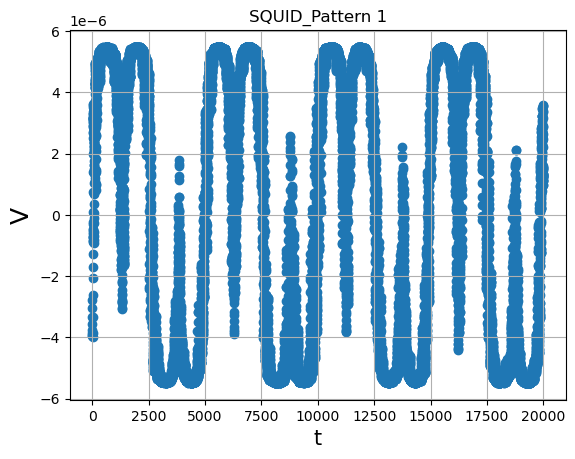

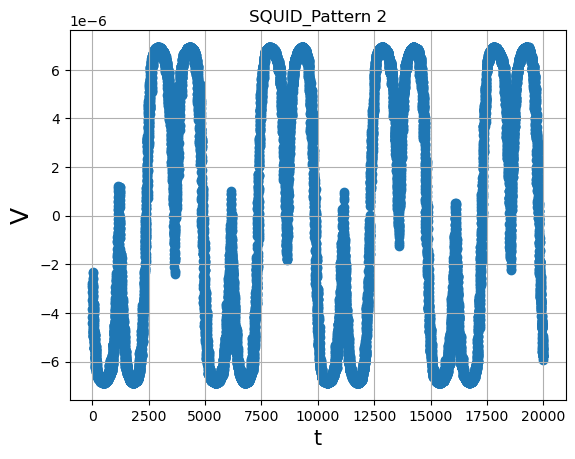

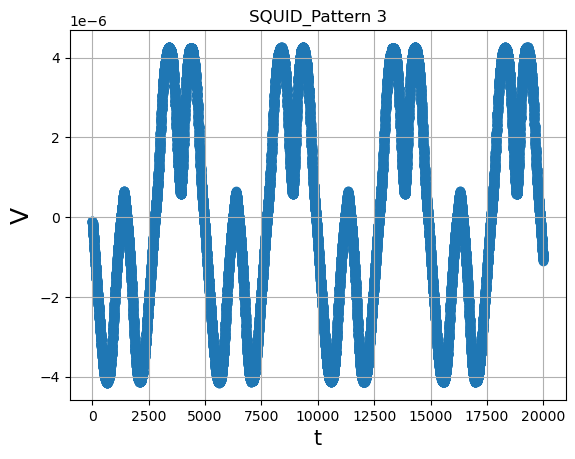

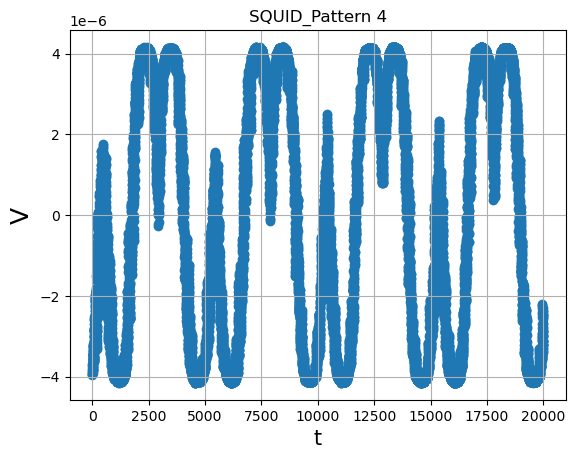

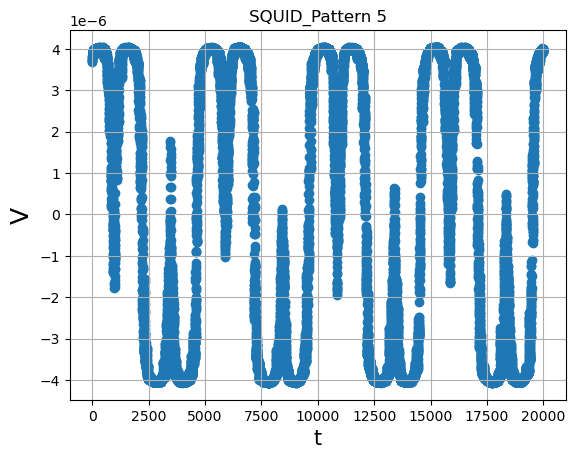

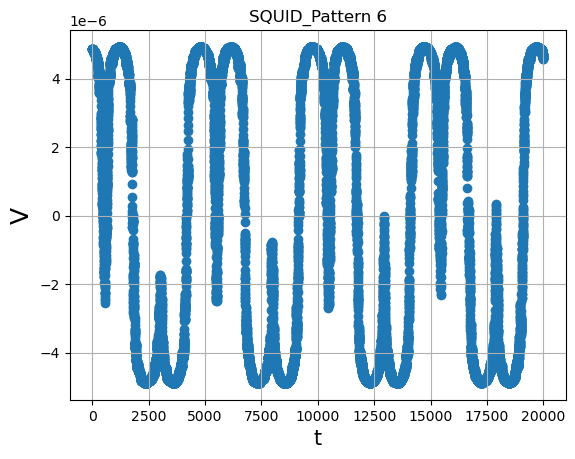

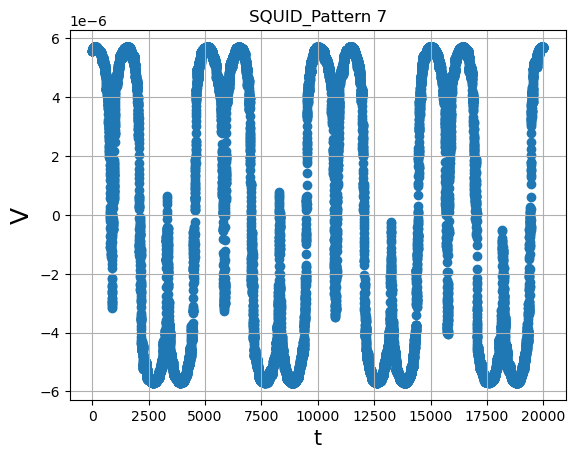

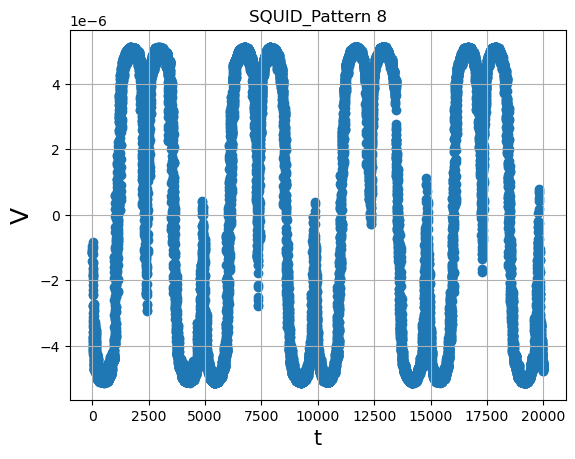

In [75]:

for i in range(8):
    # Construct the file path
    file_string = r"C:\Users\n1cos\Downloads\clusterCryostatRun18\pattern\pattern_SQ"+ str(i + 1) +"_000.bin"
    file_path = os.path.normpath(file_string)
    fd = open(file_path, 'rb')
    read_data = np.fromfile(file=fd, dtype=np.int32)#.reshape(shape)
    fd.close()
    
   
    # Convert to voltage and preprocess data
    dat = toVolt * read_data[nhead:]
    dat1 = toVolt * dat[0:20000]
    x = np.arange(len(dat1))

    # Plot the raw data
    plt.scatter(x, dat1, label='Data')
    plt.title(f"SQUID_Pattern {i + 1}")
    plt.grid(True)
    plt.xlabel('t', fontsize=15)
    plt.ylabel('V', fontsize=18)
    plt.show()


0.7597266077832345
Fitted parameters for file 8: a=0.5548622882444836, p=702.6935304262736, b=2.43786610245053


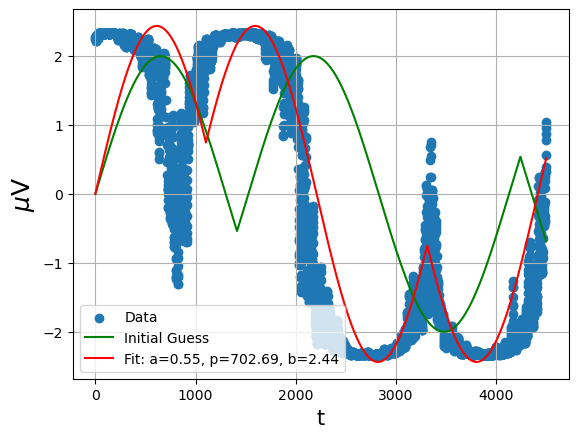

In [142]:
# Initial guess for the parameters [a, p, b]
file_string = r"C:\Users\n1cos\Downloads\clusterCryostatRun18\pattern\pattern_SQ"+ str(0 + 1) +"_000.bin"
file_path = os.path.normpath(file_string)
fd = open(file_path, 'rb')
read_data = np.fromfile(file=fd, dtype=np.int32)#.reshape(shape)
fd.close()
    
   
    # Convert to voltage and preprocess data
dat = toVolt * read_data[nhead:]
dat1 = dat[500:5000]
dat2 = dat[0:20100]
x = np.arange(len(dat1))
x2 = np.arange(len(dat2))
initial_guess = [0.46,900, 2]

max_value = np.max(dat[3000:4000])
print(max_value)
# Plot initial guess
y_initial = SQUIDWAVE(x, *initial_guess)
plt.scatter(x, dat1, label='Data')

plt.plot(x, y_initial, label='Initial Guess', color='green')
#plt.plot(x, , label='Initial Guess', color='green')
    # Fit the data
params, covariance = curve_fit(SQUIDWAVE, x, dat1, p0=initial_guess)


fitted_a, fitted_p, fitted_b = params
print(f"Fitted parameters for file {i + 1}: a={fitted_a}, p={fitted_p}, b={fitted_b}")

    # Generate the fitted curve
y_fit = SQUIDWAVE(x, fitted_a, fitted_p, fitted_b)

    # Plot the fitted curve
#plt.title(r"SQUID_Pattern 1/// b * sin((a/2$\pi$)) * np.arcsin(sin((p/2$\pi$ ) * x)))")
plt.grid(True)    
plt.plot(x, y_fit, label=f'Fit: a={fitted_a:.2f}, p={fitted_p:.2f}, b={fitted_b:.2f}', color='red')
plt.xlabel('t', fontsize=15)
plt.ylabel(r'$\mu$V', fontsize=18)
plt.legend()
plt.show()
